# Movie Recommendation System
<img src="images/Bishamon.jpg" alt="Drawing" style="width: 200px;"/>

##### This is my thesis work: "Making an ML model to making a prediction in cinematography". The Databases is taken from TMBD, using API
----------

## What are we exploring today?

----------

### Objective
##### Develop a Movie Recommendation System
------

## Importing the libraries

In [1]:
#To Work with Data
import pandas as pd
import numpy as np
from datetime import datetime

#To Vizualize the Data
import matplotlib.pyplot as plt
import seaborn as sns


### First Look at the Data

In [2]:
df = pd.read_csv('./data/movies_after_reformating.csv')

In [3]:
df.head()

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,gender_of_lead,lead
0,0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",2.0,Sam Worthington
1,1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2.0,Johnny Depp
2,2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",2.0,Daniel Craig
3,3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",2.0,Christian Bale
4,4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",2.0,Taylor Kitsch


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
df.isnull().sum().sort_values(ascending=False)

homepage                3091
tagline                  844
gender_of_lead            43
lead                      43
overview                   3
runtime                    2
release_date               1
genres                     0
budget                     0
keywords                   0
Unnamed: 0                 0
production_companies       0
popularity                 0
original_title             0
original_language          0
id                         0
spoken_languages           0
revenue                    0
production_countries       0
title_x                    0
status                     0
vote_average               0
vote_count                 0
title_y                    0
movie_id                   0
crew                       0
cast                       0
dtype: int64

## Data Cleaning

### Deleting Unnecessary Columns

In [6]:
# Drop unnecessary columns
columns_to_drop = [
    'homepage',  # Too many missing values
    'tagline',   # Too many missing values
    'Unnamed: 0',  # Unnecessary index column
    'title_x',   # Duplicate of 'original_title'
    'title_y',   # Duplicate of 'original_title'
    'movie_id',  # Duplicate of 'id'
    'gender_of_lead',  # Too many missing values
    'lead'       # Too many missing values
]

df.drop(columns=columns_to_drop, inplace=True)

df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'vote_average', 'vote_count', 'cast',
       'crew'],
      dtype='object')

### Dealing with Missing Values

In [7]:
df.dropna(subset=['budget', 'revenue'], how='all', inplace=True)
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [8]:
df.loc[df['original_title'] == 'Chiamatemi Francesco - Il Papa della gente', 'runtime'] = 98
df.loc[df['original_title'] == 'To Be Frank, Sinatra at 100', 'runtime'] = 81

In [9]:
df['overview'].fillna('Unknown', inplace=True)

C:\Users\shunp\AppData\Local\Temp\ipykernel_13576\4167807626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna('Unknown', inplace=True)


In [10]:
df.dropna(subset=['release_date'], inplace=True)

### Converting Date Fields

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

### Normalize Financial Data

In [12]:
df['budget_millions'] = df['budget'] / 1e6
df['revenue_millions'] = df['revenue'] / 1e6

### Split Multi-Value Fields

In [13]:
def extract_names(column):
    return [item['name'] for item in eval(column)] if pd.notnull(column) else []

In [14]:
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)
df['production_companies'] = df['production_companies'].apply(extract_names)
df['spoken_languages'] = df['spoken_languages'].apply(extract_names)

In [15]:
df = df[df['status'] == 'Released']

In [16]:
columns_to_drop = [
    'budget', 
    'revenue',
    'release_date',
    'id',
    'overview',
    'status'
]
df.drop(columns=columns_to_drop, inplace=True)

## Exploratory Data Analysis

In [17]:
df.shape

(4794, 18)

In [18]:
df[['budget_millions', 'revenue_millions', 'runtime', 'popularity', 'vote_average', 'vote_count', 'release_year']].describe()

,budget_millions,revenue_millions,runtime,popularity,vote_average,vote_count,release_year
count,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000
mean,29.098742,82.414895,106.930121,21.531906,6.094577,691.505006,2002.456612
std,40.741704,162.970967,22.518563,31.833348,1.187178,1235.386629,12.420223
min,0.000000,0.000000,0.000000,0.000372,0.000000,0.000000,1916.000000
25%,0.801737,0.000000,94.000000,4.725590,5.600000,54.000000,1999.000000
50%,15.000000,19.263593,103.500000,12.965232,6.200000,236.000000,2005.000000
75%,40.000000,93.182750,118.000000,28.352870,6.800000,738.000000,2011.000000
max,380.000000,2787.965087,338.000000,875.581305,10.000000,13752.000000,2017.000000


In [ ]:
df['original_language'].value_counts()

original_language
en    4497
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
ar       2
ta       2
ro       2
hu       1
xx       1
te       1
is       1
af       1
tr       1
cs       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

In [22]:
df['genres'].explode().value_counts()

genres
Drama              2292
Comedy             1718
Thriller           1272
Action             1153
Romance             893
Adventure           790
Crime               696
Science Fiction     534
Horror              519
Family              512
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         109
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64

In [ ]:
df[['budget_millions', 'revenue_millions', 'runtime', 'popularity', 'vote_average', 'vote_count']].hist(bins=30, figsize=(15, 10))
plt.show()

### Histograms for Numerical Columns

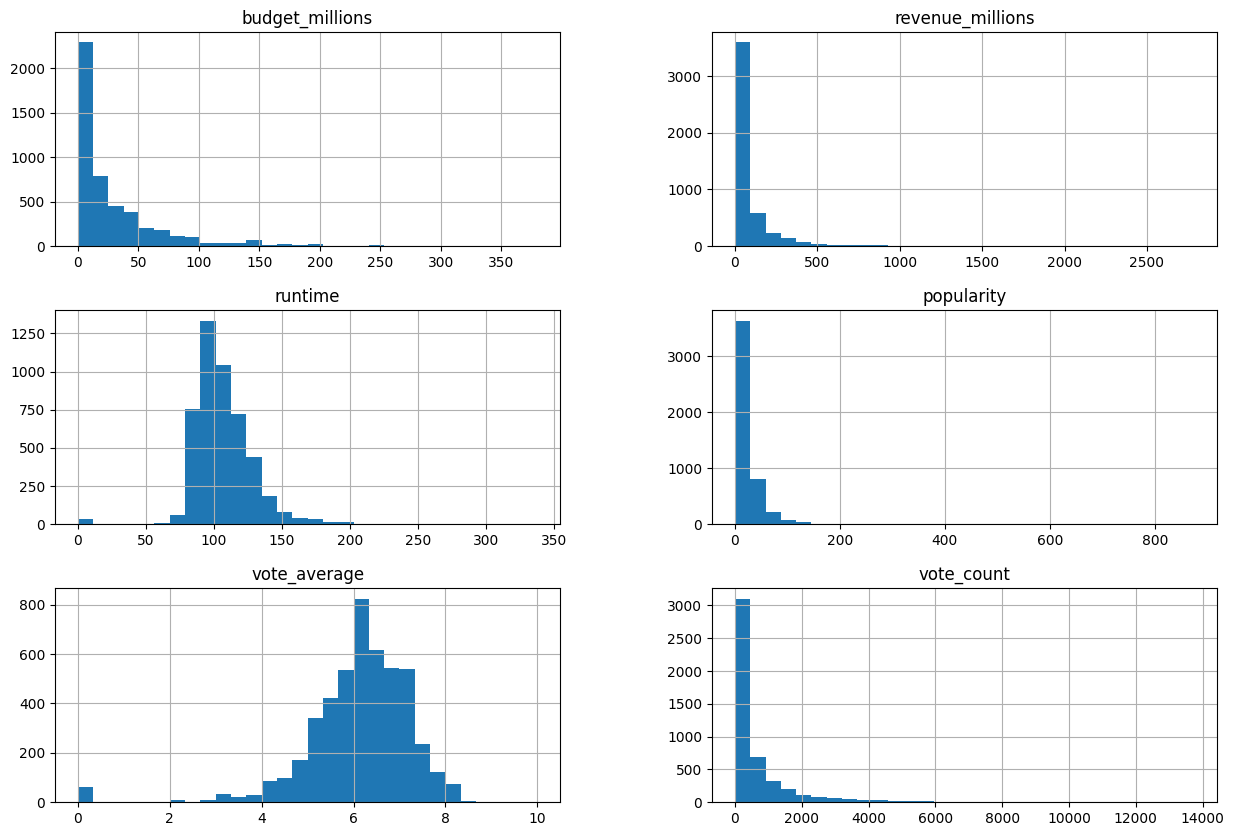

In [23]:
df[['budget_millions', 'revenue_millions', 'runtime', 'popularity', 'vote_average', 'vote_count']].hist(bins=30, figsize=(15, 10))
plt.show()

### Movies Released Per Year

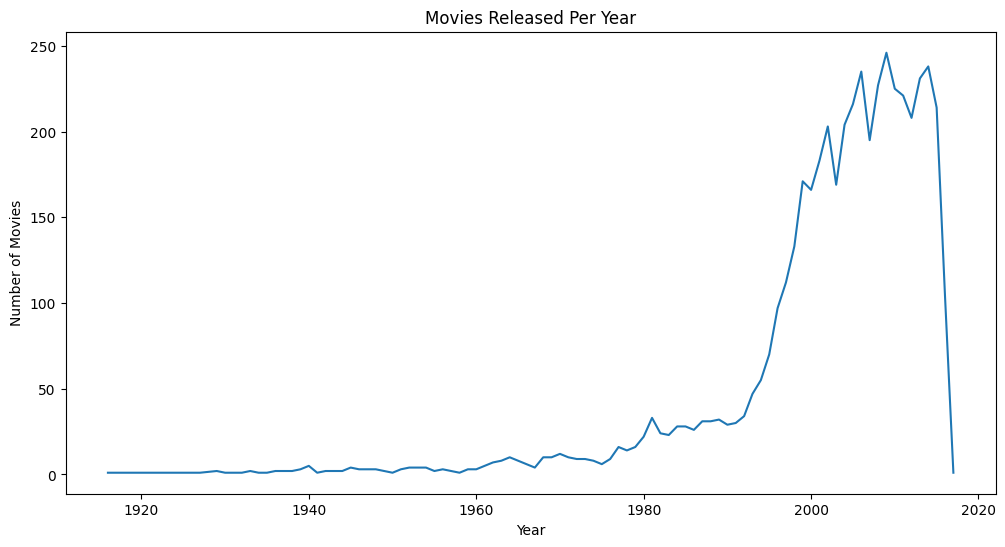

In [ ]:
movies_per_year = df['release_year'].value_counts().sort_index()
movies_per_year.plot(kind='line', figsize=(12, 6), title='Movies Released Per Year')

plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

### Average Revenue and Budget Over Time

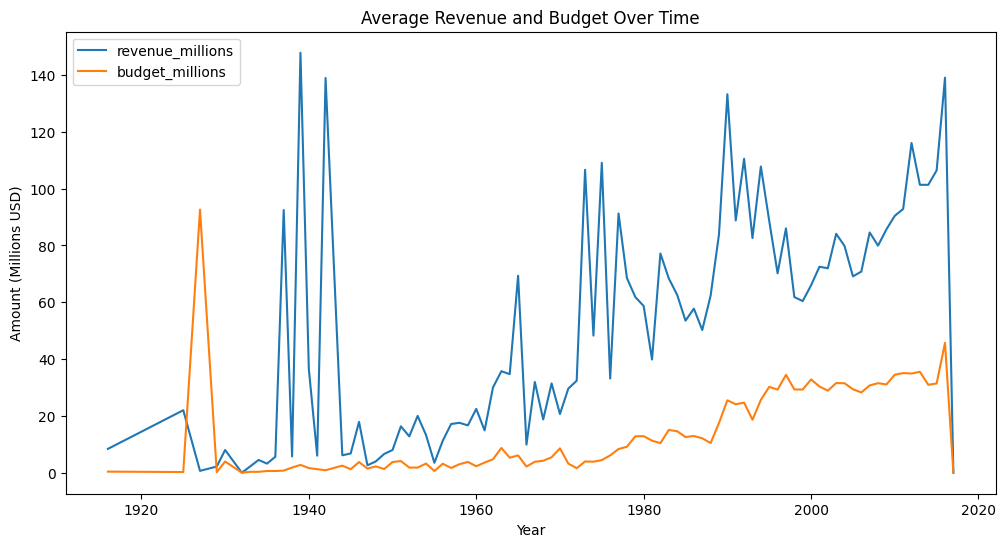

In [26]:
df.groupby('release_year')[['revenue_millions', 'budget_millions']].mean().plot(figsize=(12, 6))

plt.title('Average Revenue and Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (Millions USD)')

plt.show()

### Most Common Genres

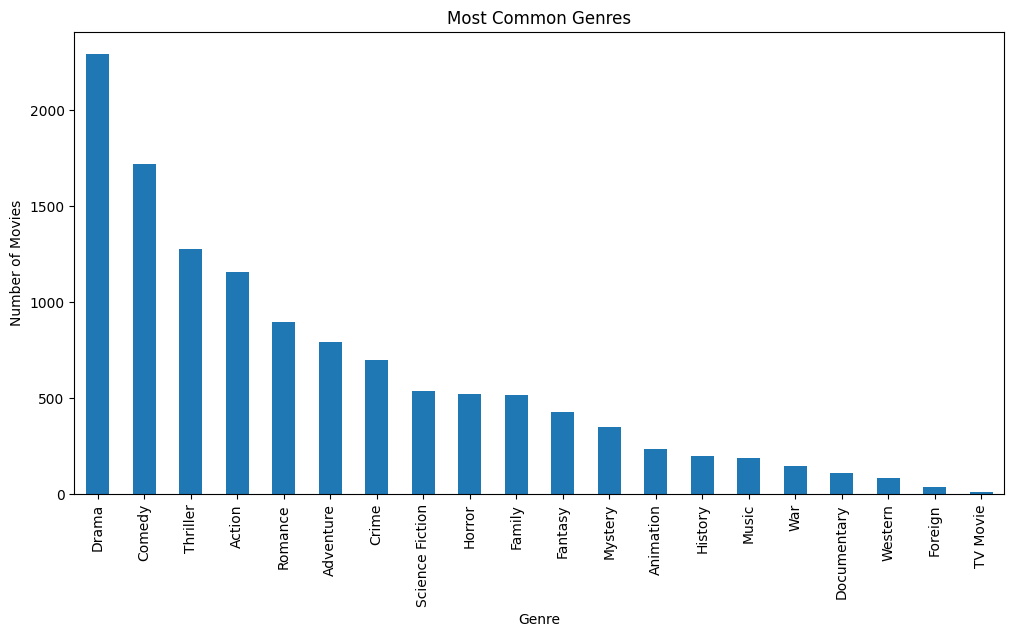

In [27]:
genre_counts = df['genres'].explode().value_counts()

genre_counts.plot(kind='bar', figsize=(12, 6), title='Most Common Genres')

plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.show()

### Average Revenue by Genre

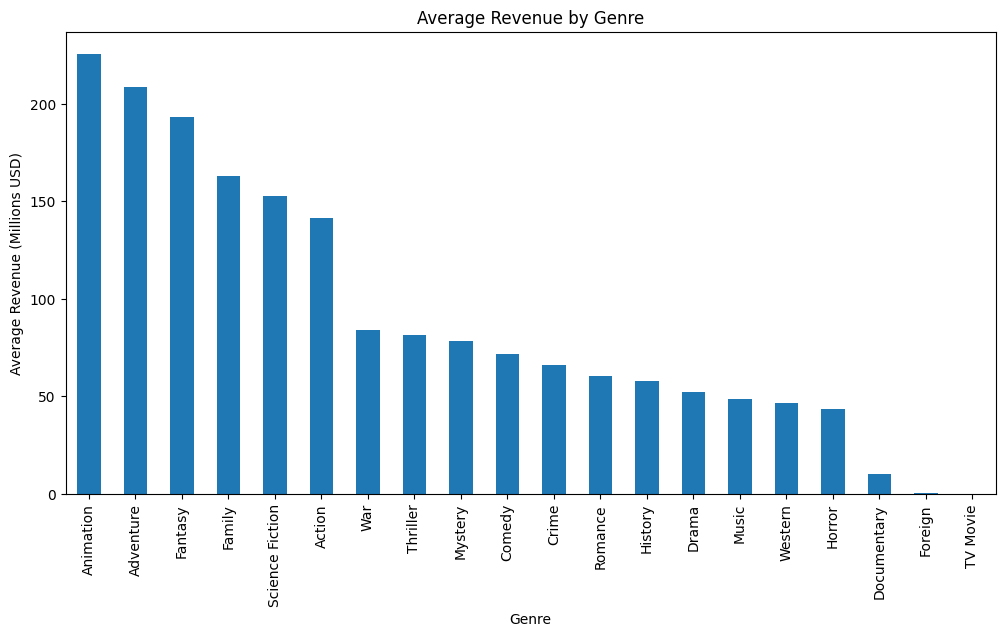

In [28]:
genre_revenue = df.explode('genres').groupby('genres')['revenue_millions'].mean().sort_values(ascending=False)

genre_revenue.plot(kind='bar', figsize=(12, 6), title='Average Revenue by Genre')

plt.xlabel('Genre')
plt.ylabel('Average Revenue (Millions USD)')

plt.show()

### Budget vs. Revenue

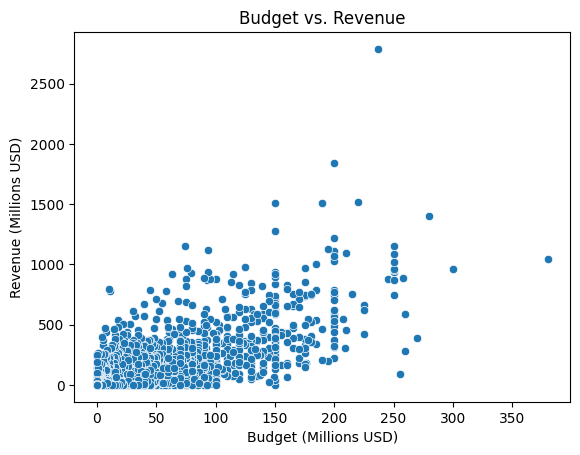

In [30]:
sns.scatterplot(x='budget_millions', y='revenue_millions', data=df)

plt.title('Budget vs. Revenue')
plt.xlabel('Budget (Millions USD)')
plt.ylabel('Revenue (Millions USD)')

plt.show()

### Popularity vs. Revenue

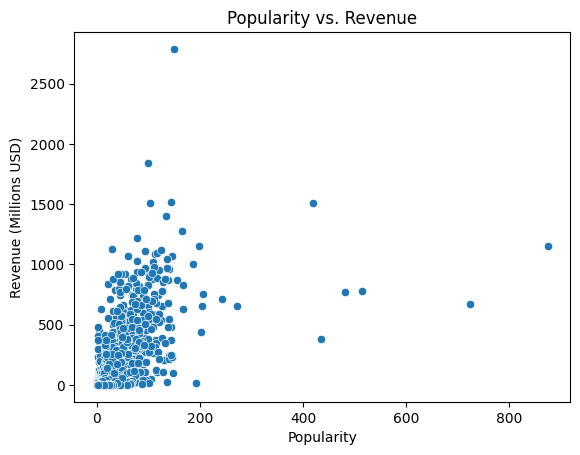

In [31]:
sns.scatterplot(x='popularity', y='revenue_millions', data=df)

plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (Millions USD)')

plt.show()

### Top Production Companies by Number of Movies

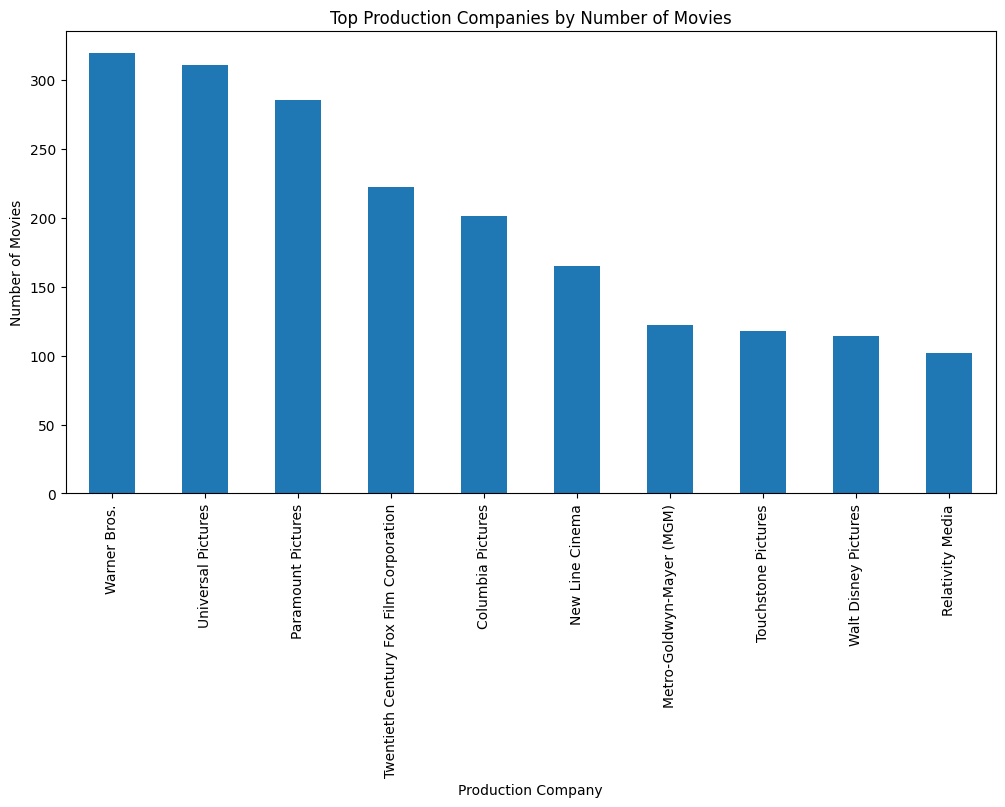

In [ ]:
production_counts = df['production_companies'].explode().value_counts().head(10)
production_counts.plot(kind='bar', figsize=(12, 6), title='Top Production Companies by Number of Movies')

plt.xlabel('Production Company')
plt.ylabel('Number of Movies')

plt.show()

### Top Production Companies by Revenue

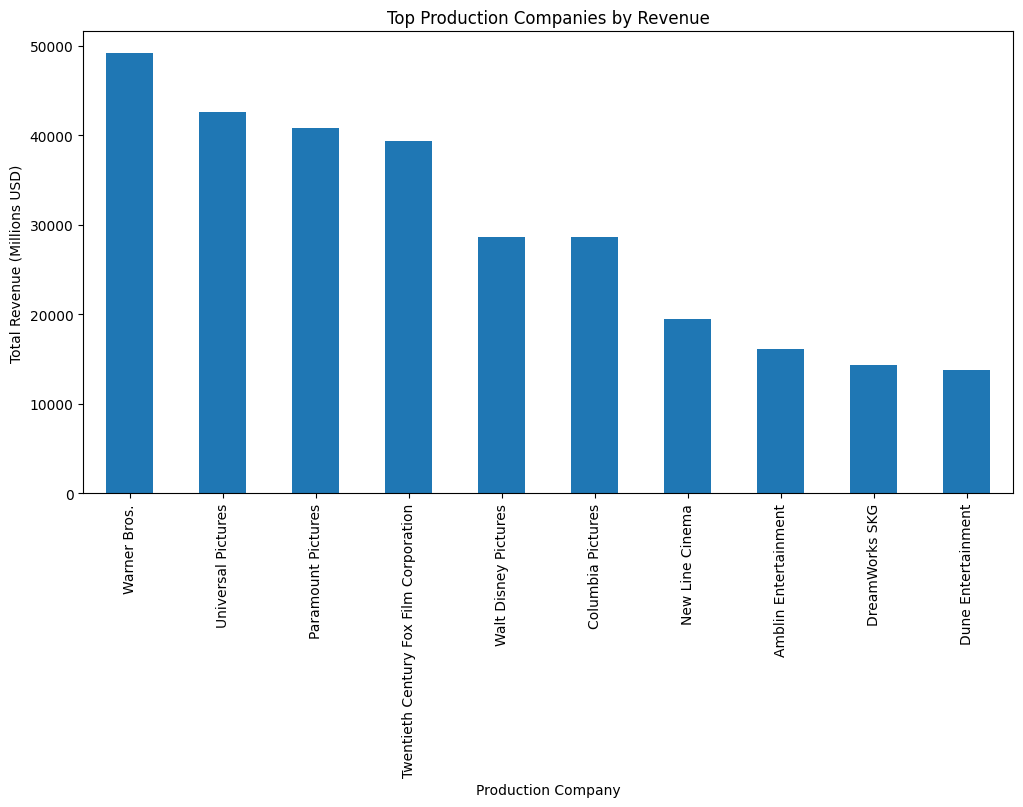

In [34]:
production_revenue = df.explode('production_companies').groupby('production_companies')['revenue_millions'].sum().sort_values(ascending=False).head(10)

production_revenue.plot(kind='bar', figsize=(12, 6), title='Top Production Companies by Revenue')

plt.xlabel('Production Company')
plt.ylabel('Total Revenue (Millions USD)')

plt.show()

### Correlation Heatmap

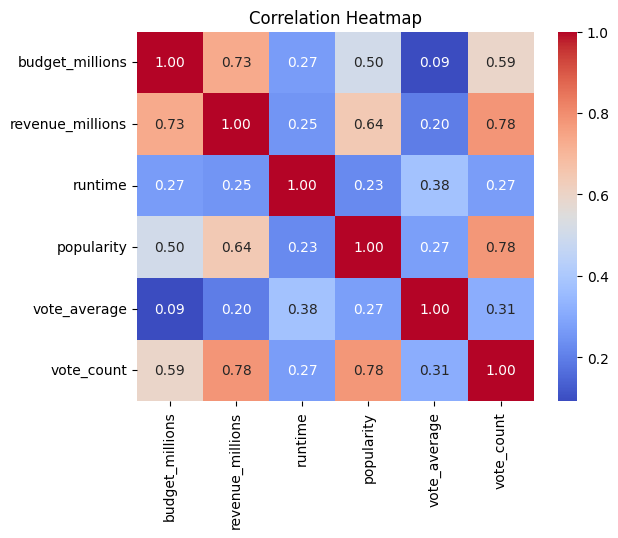

In [29]:
corr = df[['budget_millions', 'revenue_millions', 'runtime', 'popularity', 'vote_average', 'vote_count']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')

plt.show()

### Сontent-Based Recommendation System

In [37]:
df['metadata'] = df.apply(lambda x: ' '.join(x['genres']) + ' ' + ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['crew']), axis=1)

df[['original_title', 'metadata']].head()

,original_title,metadata
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...


### Vectorize the Metadata

From Text to Numerical Vectors 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['metadata'])

print(tfidf_matrix.shape)

(4794, 7063)


### Compute Similarity Between Movies 

Cosine Similarity to Measure Similarity Based on Vectors

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(cosine_sim.shape)

(4794, 4794)


### Build the Recommendation Function

In [48]:
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()

indices.head()


original_title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [51]:
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:top_n+1]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df['original_title'].iloc[movie_indices]


In [63]:
recommendations = get_recommendations('Kurmanjan Datka. Queen of the Mountains', top_n=5)
recommendations

4278      Neal 'n' Nikki
3028    Mo' Better Blues
3461         School Daze
2347                Fame
2487               Duets
Name: original_title, dtype: object

### Save

In [65]:
import joblib

joblib.dump(tfidf, './model/tfidf_vectorizer.pkl')
np.save('./model/cosine_sim.npy', cosine_sim)
df[['original_title', 'metadata']].to_csv('./data/movie_metadata.csv', index=False)
